**Task 3(a): Take grayscale image of size 512x512, sse different size of mask (3x3, 5x5, 7x7) with average filter for noise suppression & observe their performance in term of PSNR**

### Importing the Libraries

In [100]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Function for Average Spatial Filter
- **Function: output_image = cv2.blur(input_image, (kernel_size, kernel_size))**

In [101]:
def average_filter(image, mask_size):
    filtered_image = []
    height, width = image.shape
    offset, weight = mask_size // 2, mask_size * mask_size

    for r in range(height):
        nth_row = []
        for c in range(width):
            pixel = 0
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if (r + x >= 0 and r + x < height and c + y >= 0 and c + y < width):
                        pixel += (image[r + x, c + y] / weight)
            nth_row.append(pixel)
        filtered_image.append(nth_row)

    return np.uint8(filtered_image)

### Function for adding Salt & Pepper Noise

In [102]:
def add_salt_pepper_noise(image, percent):
    noisy_image = image.copy()
    noise_amount = (image.shape[0] * image.shape[1]) * (percent / 100)

    for k in range(int(noise_amount)):
        index = []
        for x in range(1, 5):
            index.append(np.random.randint(0, image.shape[0]))
        noisy_image[index[0], index[1]], noisy_image[index[2], index[3]] = 0, 255

    return noisy_image

### Function for calculating PSNR (Peak Signal to Noise Ratio)
- **Function: psnr = cv2.PSNR(image1, image2)**

In [103]:
def compute_psnr(image1, image2):
    image1, image2 = np.float64(image1), np.float64(image2)
    mse = np.mean((image1 - image2) ** 2) 
    if mse == 0:
        return float('inf')
    psnr = 20 * np.log10(255.0) - 10 * np.log10(mse)
    return round(psnr, 2)

### Loading the Image

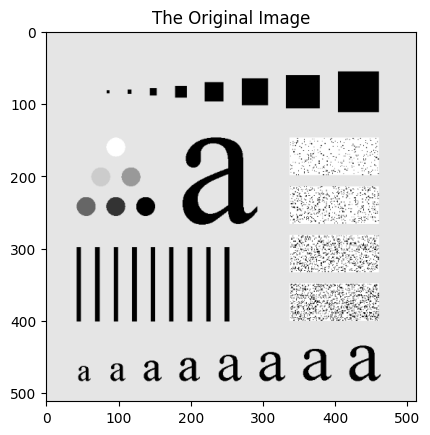

In [104]:
input_image = cv2.imread("./Fig0445(a) Characters Test Pattern 688x688.tif", 0)
input_image = cv2.resize(input_image, (512, 512))
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title("The Original Image")
plt.show()

### Adding Salt & Pepper Noise

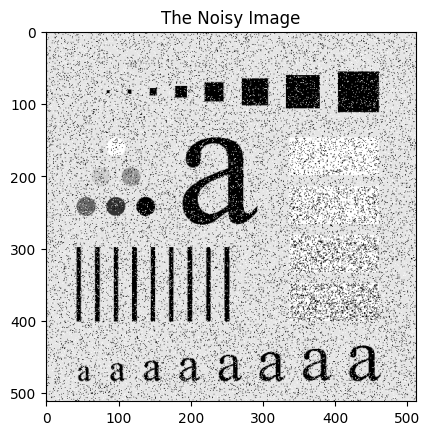

PSNR = 12.61


12.605632353390895

In [105]:
noisy_image = add_salt_pepper_noise(input_image, 7)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title("The Noisy Image")
plt.show()
psnr = compute_psnr(input_image, noisy_image)
print(f"PSNR = {psnr}")
cv2.PSNR(input_image, noisy_image)

### Applying various sizes of Average Spatial Filters

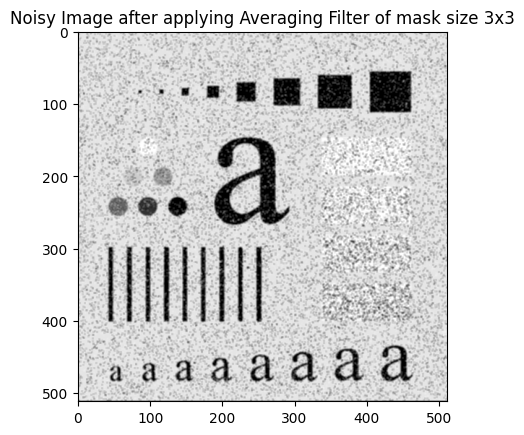

PSNR = 17.92


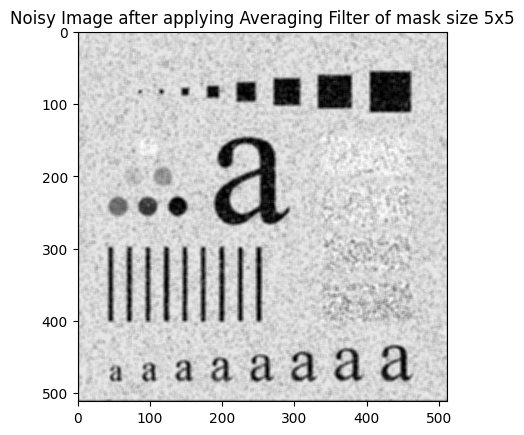

PSNR = 17.64


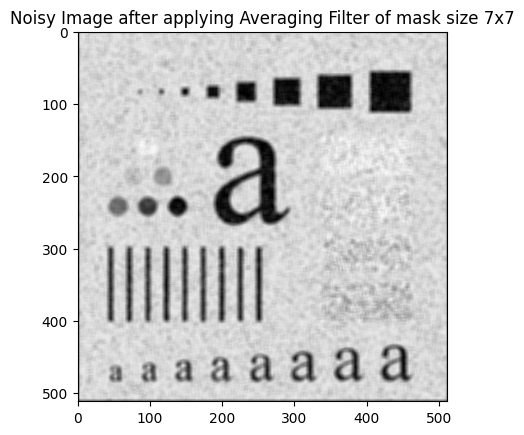

PSNR = 16.98


In [106]:
for x in range(3, 8, 2):
    filtered_image = average_filter(noisy_image, x)
    plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Noisy Image after applying Averaging Filter of mask size {x}x{x}")
    plt.show()
    psnr = compute_psnr(input_image, filtered_image)
    print(f"PSNR = {psnr}")
